In [2]:
import pandas as pd

stock = pd.read_csv('dataset/stock.csv', index_col='Date', parse_dates=True)

for id in set(stock.Id):
    display(pd.DataFrame(stock[stock.Id == id]))


,Id,Name,Open,High,Low,Close,Volume
Date,,,,,,,
2023-10-27,2382,廣達,206.0,206.5,201.5,203.0,36587.0
2023-10-26,2382,廣達,202.0,206.0,201.0,202.5,43216.0
2023-10-25,2382,廣達,210.0,214.0,207.0,210.5,42224.0
2023-10-24,2382,廣達,204.0,209.0,200.5,209.0,54659.0
2023-10-23,2382,廣達,201.5,207.5,200.0,200.5,43526.0
...,...,...,...,...,...,...,...
2019-01-08,2382,廣達,52.6,53.0,52.5,52.8,7578.0
2019-01-07,2382,廣達,52.8,53.0,52.0,52.5,10231.0
2019-01-04,2382,廣達,51.8,52.5,51.2,52.0,6337.0


,Id,Name,Open,High,Low,Close,Volume
Date,,,,,,,
2023-10-27,2330,台積電,534.0,536.0,532.0,533.0,17050.0
2023-10-26,2330,台積電,530.0,535.0,530.0,531.0,31682.0
2023-10-25,2330,台積電,544.0,551.0,544.0,544.0,17137.0
2023-10-24,2330,台積電,543.0,546.0,540.0,544.0,15761.0
2023-10-23,2330,台積電,552.0,553.0,543.0,544.0,24172.0
...,...,...,...,...,...,...,...
2019-01-08,2330,台積電,212.0,212.5,210.0,211.0,23794.0
2019-01-07,2330,台積電,212.0,214.0,211.0,213.0,35695.0
2019-01-04,2330,台積電,211.5,211.5,206.5,208.0,67043.0


,Id,Name,Open,High,Low,Close,Volume
Date,,,,,,,
2023-10-27,2317,鴻海,98.5,98.9,98.2,98.2,33549.0
2023-10-26,2317,鴻海,98.3,98.7,98.0,98.5,42562.0
2023-10-25,2317,鴻海,98.3,99.5,98.3,99.0,41361.0
2023-10-24,2317,鴻海,99.8,99.8,97.3,98.3,113705.0
2023-10-23,2317,鴻海,102.0,102.0,100.0,100.5,84175.0
...,...,...,...,...,...,...,...
2019-01-08,2317,鴻海,69.6,69.6,68.2,68.6,18303.0
2019-01-07,2317,鴻海,68.7,69.4,68.3,69.3,24084.0
2019-01-04,2317,鴻海,68.2,68.2,67.0,67.6,37313.0


,Id,Name,Open,High,Low,Close,Volume
Date,,,,,,,
2023-10-27,2454,聯發科,824.0,824.0,800.0,801.0,7422.0
2023-10-26,2454,聯發科,815.0,817.0,811.0,817.0,5768.0
2023-10-25,2454,聯發科,818.0,832.0,816.0,822.0,6590.0
2023-10-24,2454,聯發科,821.0,823.0,804.0,816.0,5162.0
2023-10-23,2454,聯發科,825.0,829.0,816.0,821.0,5392.0
...,...,...,...,...,...,...,...
2019-01-08,2454,聯發科,221.0,222.5,218.5,222.0,4626.0
2019-01-07,2454,聯發科,221.0,221.5,217.5,219.0,7008.0
2019-01-04,2454,聯發科,218.5,218.5,213.5,217.0,6492.0


In [3]:
from numpy import ndarray

"""單期簡單收益率"""

def single_period_return(stock_id: int, n: int = 1) -> ndarray:
    # 只留下 Close.
    close = stock[stock.Id == stock_id]['Close']
    lag_close = close.shift(n)
    
    # 計算單期簡單收益率
    simple_return = (close - lag_close) / lag_close * 100
    simple_return.name = 'simpleret'
    return simple_return
    
def get_average_returns(series: ndarray) -> int:
    return series.sum() / len(series)
    

Average returns:  -0.08086443560290792


<Axes: ylabel='Frequency'>

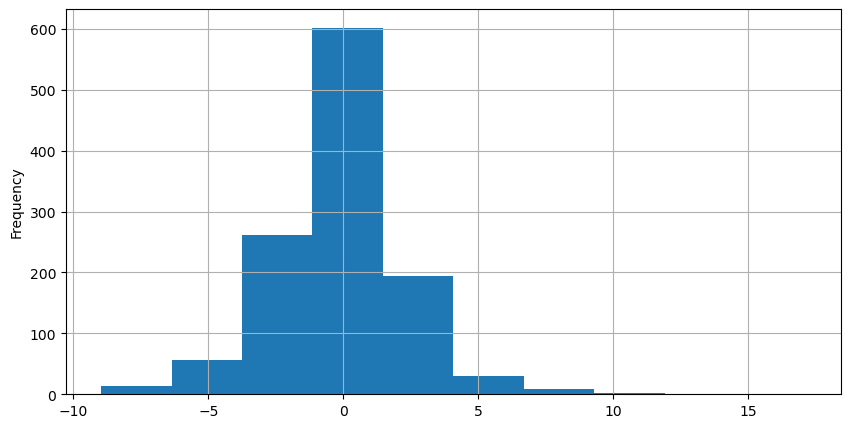

In [4]:
analyzed = single_period_return(2454, 1)
print("Average returns: ", get_average_returns(analyzed))
analyzed.plot(kind='hist', grid=True, figsize=(10, 5))

Average returns:  -0.41329880400370983


<Axes: >

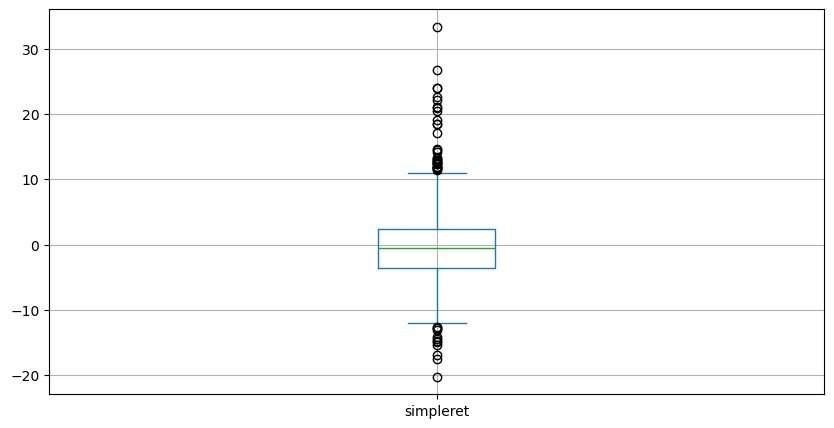

In [5]:
analyzed = single_period_return(2454, 5)
print("Average returns: ", get_average_returns(analyzed))
analyzed.plot(kind='box', grid=True, figsize=(10, 5))
# analyzed.plot(kind='kde', grid=True, figsize=(10, 5))

<Axes: xlabel='Date'>

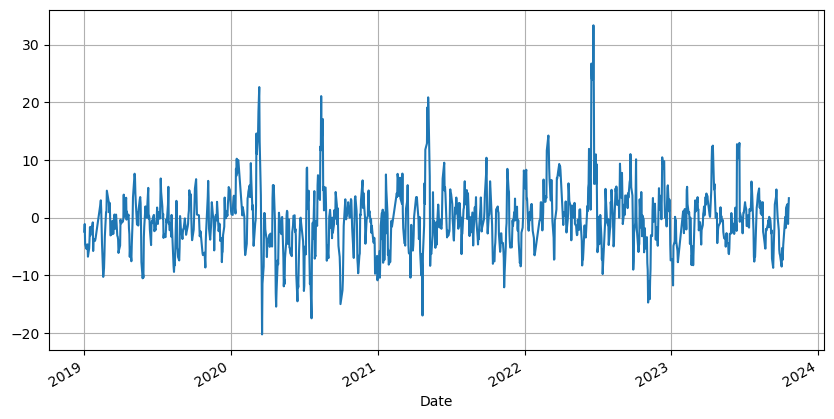

In [6]:
analyzed.plot(kind='line', grid=True, figsize=(10, 5))

In [7]:
analyzed 

Date
2023-10-27         NaN
2023-10-26         NaN
2023-10-25         NaN
2023-10-24         NaN
2023-10-23         NaN
                ...   
2019-01-08   -4.721030
2019-01-07   -5.399568
2019-01-04   -4.615385
2019-01-03   -1.106195
2019-01-02   -2.433628
Name: simpleret, Length: 1171, dtype: float64

In [8]:
import ffn
ffn.to_log_returns(stock[stock.Id == 2330]['Close'])

Date
2023-10-27         NaN
2023-10-26   -0.003759
2023-10-25    0.024187
2023-10-24    0.000000
2023-10-23    0.000000
                ...   
2019-01-08   -0.021103
2019-01-07    0.009434
2019-01-04   -0.023754
2019-01-03    0.035423
2019-01-02    0.018391
Name: Close, Length: 1171, dtype: float64

In [9]:
stock[stock.Id == 3306]['Close']

Series([], Name: Close, dtype: float64)

In [10]:
"""累計簡單收益率"""

def cumulated_returns(stock_id: int) -> ndarray:
    simple_ret = ffn.to_returns(stock[stock.Id == stock_id]['Close'])
    cumulated_ret = (1 + simple_ret).cumprod() - 1
    
    return cumulated_ret

In [11]:
cumulated_returns(2454)

Date
2023-10-27         NaN
2023-10-26    0.019975
2023-10-25    0.026217
2023-10-24    0.018727
2023-10-23    0.024969
                ...   
2019-01-08   -0.722846
2019-01-07   -0.726592
2019-01-04   -0.729089
2019-01-03   -0.720974
2019-01-02   -0.724719
Name: Close, Length: 1171, dtype: float64

In [12]:
cumulated_returns(2382)

Date
2023-10-27         NaN
2023-10-26   -0.002463
2023-10-25    0.036946
2023-10-24    0.029557
2023-10-23   -0.012315
                ...   
2019-01-08   -0.739901
2019-01-07   -0.741379
2019-01-04   -0.743842
2019-01-03   -0.741379
2019-01-02   -0.743350
Name: Close, Length: 1171, dtype: float64

In [13]:
cumulated_returns(2330)

Date
2023-10-27         NaN
2023-10-26   -0.003752
2023-10-25    0.020638
2023-10-24    0.020638
2023-10-23    0.020638
                ...   
2019-01-08   -0.604128
2019-01-07   -0.600375
2019-01-04   -0.609756
2019-01-03   -0.595685
2019-01-02   -0.588180
Name: Close, Length: 1171, dtype: float64

公司治理評鑑：https://cgc.twse.com.tw/evaluationCorp/listCh
https://cgc.twse.com.tw/static/20230427/8a828e17879705e90187c1cddc4a0010_111%E5%B9%B4(%E7%AC%AC9%E5%B1%86)%E5%85%AC%E5%8F%B8%E6%B2%BB%E7%90%86%E8%A9%95%E9%91%91%E7%B3%BB%E7%B5%B1%E8%A9%95%E9%91%91%E7%B5%90%E6%9E%9C%E6%9A%A8%E8%A9%95%E9%91%91%E7%A8%8B%E5%BA%8F%E8%AA%AA%E6%98%8E.pdf

## 下檔風險

In [14]:
def cal_half_dev(returns: ndarray) -> float:
    """計算下檔風險"""
    mu = returns.mean()
    returns_lower_than_mu = returns[returns < mu]
    helf_deviation = (sum((mu-returns_lower_than_mu)**2)/len(returns))**0.5
    
    return helf_deviation

cal_half_dev(single_period_return(2454))

1.6767232774883567

In [15]:
# 歷史模擬法
single_period_return(2454).quantile(0.05)

-4.089746742070322

In [16]:
simpleret = single_period_return(2454)

# 共變異數矩陣法
from scipy.stats import norm
norm.ppf(0.05, simpleret.mean(), simpleret.std())

-4.070977514403978

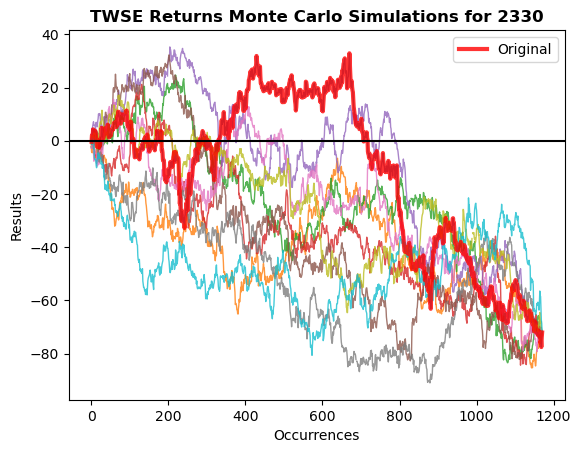

In [21]:
import pandas_montecarlo

# 蒙地卡羅法
stock_code = 2330
simpleret = single_period_return(stock_code)
mc = simpleret.montecarlo(sims=10, bust=-0.1, goal=1)
mc.plot(title=f"TWSE Returns Monte Carlo Simulations for {stock_code}")

In [25]:
# 最大交易虧損 MDD
print("MDD:", mc.stats['maxdd'])

# 最大交易虧損 MDD 的統計量
print("Mean of MDD:", mc.maxdd['mean'])

MDD: -91.02502020836825
Mean of MDD: -81.08312819201188


## homework 2

![](SCR-20231120-ohaz-2.png)

In [ ]:
# Practice:  請將台積電、國泰金以及你所選擇的另一檔投資標的
# 2015 的報酬及風險整理如下表，並說明你會如何投資？

# 報酬,風險(std),